# [실습]
## 네이버 웹툰 홈페이지를 스크랩핑해서  요일별 웹툰을 데이터프레임으로 생성해보기

In [1]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version: 1.20.1
pandas version: 1.2.4


In [39]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError
import requests
import re

In [3]:
# 웹툰홈페이지에서 태그들 가져오기
try:
    html=urlopen('https://comic.naver.com/webtoon/weekday')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup=BeautifulSoup(html.read(),'html.parser')
    print(soup)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<title>네이버 만화 &gt; 요일별  웹툰 &gt; 전체웹툰</title>
<meta content="네이버 웹툰" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/comic/images/og_tag_v2.png" property="og:image"/>
<meta content="매일매일 새로운 재미, 네이버 웹툰." property="og:description"/>
<meta content="https://comic.naver.com/webtoon/weekday" property="og:url"/>
<meta content="article" property="og:type"/>
<meta content="네이버 웹툰" property="og:article:author"/>
<meta content="https://comic.naver.com" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/static/comic/favicon/webtoon_favicon_32x32.ico" rel="shortcut icon" type="image/x-icon"/>
<script type="text/javascript">
		document.domain = "naver.com";
	</script>
<link href="/css/comic/comic_20210909160107.css" rel="stylesheet" style="text/css"/>
<!-- comicWeekdayJsFile -->
<script c

In [4]:
# 필요한 부분만 변수에 담기

table = soup.find(class_='list_area daily_all') # table은 태그니까 find 사용해야함.
table

<div class="list_area daily_all">
<div class="col col_selected">
<div class="col_inner">
<h4 class="mon"><span>월요 웹툰</span></h4>
<ul>
<li>
<div class="thumb">
<a href="/webtoon/list?titleId=758037&amp;weekday=mon" onclick="nclk_v2(event,'thm*m.img','','1')">
<img alt="참교육" height="90" onerror="this.src='https://ssl.pstatic.net/static/comic/images/migration/common/blank.gif'" src="https://shared-comic.pstatic.net/thumb/webtoon/758037/thumbnail/thumbnail_IMAG10_a2297504-4912-4c7e-a5a8-524d6fc77103.jpg" title="참교육" width="83"/><span class="mask"></span>
<em class="ico_updt"></em>
</a>
</div>
<a class="title" href="/webtoon/list?titleId=758037&amp;weekday=mon" onclick="nclk_v2(event,'thm*m.tit','','1')" title="참교육">참교육</a>
</li>
<li>
<div class="thumb">
<a href="/webtoon/list?titleId=183559&amp;weekday=mon" onclick="nclk_v2(event,'thm*m.img','','2')">
<img alt="신의 탑" height="90" onerror="this.src='https://ssl.pstatic.net/static/comic/images/migration/common/blank.gif'" src="https://shared-

In [8]:
table.find_all('div', {'class': 'col'})

[<div class="col col_selected">
 <div class="col_inner">
 <h4 class="mon"><span>월요 웹툰</span></h4>
 <ul>
 <li>
 <div class="thumb">
 <a href="/webtoon/list?titleId=758037&amp;weekday=mon" onclick="nclk_v2(event,'thm*m.img','','1')">
 <img alt="참교육" height="90" onerror="this.src='https://ssl.pstatic.net/static/comic/images/migration/common/blank.gif'" src="https://shared-comic.pstatic.net/thumb/webtoon/758037/thumbnail/thumbnail_IMAG10_a2297504-4912-4c7e-a5a8-524d6fc77103.jpg" title="참교육" width="83"/><span class="mask"></span>
 <em class="ico_updt"></em>
 </a>
 </div>
 <a class="title" href="/webtoon/list?titleId=758037&amp;weekday=mon" onclick="nclk_v2(event,'thm*m.tit','','1')" title="참교육">참교육</a>
 </li>
 <li>
 <div class="thumb">
 <a href="/webtoon/list?titleId=183559&amp;weekday=mon" onclick="nclk_v2(event,'thm*m.img','','2')">
 <img alt="신의 탑" height="90" onerror="this.src='https://ssl.pstatic.net/static/comic/images/migration/common/blank.gif'" src="https://shared-comic.pstatic.net

In [20]:
월요웹툰=[]
화요웹툰=[]
수요웹툰=[]
목요웹툰=[]
금요웹툰=[]
토요웹툰=[]
일요웹툰=[]

for div in table.find_all('div', {'class': 'col'}):
    a_list= div.find_all('a',{'class':'title'})
    for title in a_list:
        #print(title.get_text()) # title 가져오기
        #print(title['href'][-3:]) # 요일 가져오기
        if title['href'][-3:] == 'mon': # 월요웹툰만 
            월요웹툰.append(title.text)
        elif title['href'][-3:] == 'tue':
            화요웹툰.append(title.text)
        elif title['href'][-3:] == 'wed':
            수요웹툰.append(title.text)
        elif title['href'][-3:] == 'thu':
            목요웹툰.append(title.text)            
        elif title['href'][-3:] == 'fri':
            금요웹툰.append(title.text)            
        elif title['href'][-3:] == 'sat':
            토요웹툰.append(title.text)  
        else:
            일요웹툰.append(title.text)
월요웹툰

['참교육',
 '신의 탑',
 '뷰티풀 군바리',
 '윈드브레이커',
 '팔이피플',
 '소녀의 세계',
 '장씨세가 호위무사',
 '백수세끼',
 '파이게임',
 '앵무살수',
 '만렙돌파',
 '더블클릭',
 '삼매경',
 '잔불의 기사',
 '약초마을 연쇄살초사건',
 '요리GO',
 '홍천기',
 '유일무이 로맨스',
 '바퀴',
 '히어로메이커',
 '똑 닮은 딸',
 '칼가는 소녀',
 '결혼생활 그림일기',
 '물어보는 사이',
 '오늘의 순정망화',
 'ㅋㄷㅋㄷ만화',
 '꼬리잡기',
 '말박왕',
 '평범한 8반',
 '영앤리치가 아니야!',
 '아는 여자애',
 '수영만화일기',
 '아, 쫌 참으세요 영주님!',
 '황제와의 하룻밤',
 '장난감',
 '꿈의 기업',
 '순정말고 순종',
 '리턴 투 플레이어',
 '최후의 금빛아이',
 '하루의 하루',
 '와이키키 뱀파이어',
 '야생천사 보호구역',
 '모스크바의 여명',
 '사랑의 헌옷수거함',
 '착한건 돈이된다',
 '선배, 그 립스틱 바르지 마요',
 '왕따협상',
 '백호랑',
 '또다시, 계약 부부',
 '원하는 건 너 하나',
 '이중첩자',
 '라서드',
 '마지막 지수',
 '드로잉 레시피',
 '사막에 핀 달',
 '살아간다',
 '이탄국의 자청비',
 '중독연구소',
 '그림자 신부',
 '모락모락 왕세자님',
 '바로 보지 않는',
 '개밥 먹는 남자',
 '트리거',
 '헬로맨스',
 '보살님이 캐리해!',
 '오로지 오로라',
 '기사님을 지켜줘']

## 요일별 인기순 top 10 웹툰 제목을 담은 데이터 프레임 생성해보기

In [24]:
# 각 리스트들 length 확인
print('월요웹툰 len:',len(월요웹툰))
print('화요웹툰 len:',len(화요웹툰))
print('수요웹툰 len:',len(수요웹툰))
print('목요웹툰 len:',len(목요웹툰))
print('금요웹툰 len:',len(금요웹툰))
print('토요웹툰 len:',len(토요웹툰))
print('일요웹툰 len:',len(일요웹툰))
# 개수가 달라서 이대로 데이터프레임 생성시 오류발생

월요웹툰 len: 67
화요웹툰 len: 69
수요웹툰 len: 63
목요웹툰 len: 68
금요웹툰 len: 68
토요웹툰 len: 63
일요웹툰 len: 69


In [28]:
# 각 리스트들의 개수가 달라서 이대로 데이터프레임 생성시 오류발생하기 때문에
# 제일 긴 길이의 데이터를 기준으로, 빈 공간은 NA로써  Nan 혹은 Null값으로 채울것이다.

webtoon_dic={
    '월요웹툰' : 월요웹툰,
    '화요웹툰' : 화요웹툰,
    '수요웹툰' : 수요웹툰,
    '목요웹툰' : 목요웹툰,
    '금요웹툰' : 금요웹툰,
    '토요웹툰' : 토요웹툰,
    '일요웹툰' : 일요웹툰,
}

daily_webtoon = pd.DataFrame.from_dict(webtoon_dic,orient='index')
daily_webtoon = daily_webtoon.T
daily_webtoon 

,월요웹툰,화요웹툰,수요웹툰,목요웹툰,금요웹툰,토요웹툰,일요웹툰
0,참교육,여신강림,전지적 독자 시점,더 복서,외모지상주의,호랑이형님,무서운게 딱좋아!
1,신의 탑,덴큐,헬퍼 2 : 킬베로스,연애혁명,나 혼자 만렙 뉴비,조조코믹스,싸움독학
2,뷰티풀 군바리,용사가 돌아왔다,조조코믹스,독립일기,유미의 세포들 외전 : 프로 직장인,프리드로우,독립일기
3,윈드브레이커,한림체육관,모죠의 일지,기기괴괴,데드퀸,스퍼맨 : 전하지 못한 이야기,수희0(tngmlek0)
4,팔이피플,엽총소년,캐슬,나노마신,1초,모죠의 일지,이번 생도 잘 부탁해
...,...,...,...,...,...,...,...
64,보살님이 캐리해!,기밀입니다,None,모어 라이프,강림전기 개정기,None,제타
65,오로지 오로라,피로만땅,None,보물과 괴물의 도시,"행운을 빌어요, 용사님!",None,데이즈
66,기사님을 지켜줘,하나in세인,None,헬프미,도깨비 고개,None,샤인 스타
67,None,인문학적 감수성,None,바른탕진 프로젝트,매지컬 메디컬,None,푸른불꽃


### 결론 
오늘 배운 스크래핑을 실습해보려고 평소 즐겨 보던 네이버 웹툰 홈페이지를 스크래핑 해봤다.   
웹툰 홈페이지 메인화면에서 요일별 웹툰 부분만 스크래핑해서 요일별 웹툰목록을 보여주는 데이터프레임을 생성해보는 실습을 진행했다.   
원하는 부분의 태그에 접근하고, 원하는 방향으로 조작하는데 시간이 조금 걸렸지만,  
내가 원하는 데이터를 가져와서 데이터프레임으로 생성할 수 있다는 점이 신기했다.  
서로 다른 길이의 리스트나 Series로는 오류가 발생해서 데이터프레임을 만들 수 없을 거라고 생각했는데, 
구글링하여 빈값에 null값으로 채워주는 해결책을 찾은 덕분에 원하던 결과물을 완성해낼 수 있었던 것 같다.   
다른 경우에도 유용하게 사용할 수 있을 것 같고,  
앞으로도 더 다양한 사이트에서 원하는 데이터를 스크래핑해와서 분석해보고 싶어졌다. 

### [추가] 웹툰 이미지까지 가져와보기

In [12]:
table2=soup.find_all('div',{'class':'thumb'})
len(table2)

461

In [34]:
# 웹툰 이미지 추출
images = [ table2[i].find('img') for i in range(len(table2))]
#print(images)
img_url=[]
for image in images:
    url = image['src']
    img_url.append(url)
img_url

['https://shared-comic.pstatic.net/thumb/webtoon/758037/thumbnail/thumbnail_IMAG10_a2297504-4912-4c7e-a5a8-524d6fc77103.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/183559/thumbnail/thumbnail_IMAG10_9a752bec-9ebd-4214-9449-28cf4defc650.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/648419/thumbnail/thumbnail_IMAG10_1421195d-13be-4cde-bcf9-0c78d51c5ea3.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/654774/thumbnail/thumbnail_IMAG10_c966c4af-f642-4531-b39b-74c284034d9e.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/602910/thumbnail/thumbnail_IMAG10_8914c548-d69d-45d6-8008-bbc129e637c2.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/774863/thumbnail/thumbnail_IMAG10_bcaea87e-33e2-4a5f-90d7-bf6bc8998e34.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/728750/thumbnail/thumbnail_IMAG10_d991c7c7-8068-48ce-b03b-54d4df8c8197.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/733074/thumbnail/thumbnail_IMAG10_0741d1f6-2bae-474b-87ae-6f1a6998880

In [85]:
# 웹툰 제목 추출
title_list=[]

for title in soup.find_all('a',{'class':'title'}):
    title_list.append(title.text)
    
title_list

['참교육',
 '신의 탑',
 '뷰티풀 군바리',
 '소녀의 세계',
 '윈드브레이커',
 '팔이피플',
 '장씨세가 호위무사',
 '백수세끼',
 '파이게임',
 '앵무살수',
 '더블클릭',
 '만렙돌파',
 '삼매경',
 '잔불의 기사',
 '약초마을 연쇄살초사건',
 '요리GO',
 '홍천기',
 '유일무이 로맨스',
 '바퀴',
 '히어로메이커',
 '똑 닮은 딸',
 '말박왕',
 '결혼생활 그림일기',
 'ㅋㄷㅋㄷ만화',
 '오늘의 순정망화',
 '칼가는 소녀',
 '꼬리잡기',
 '물어보는 사이',
 '평범한 8반',
 '아는 여자애',
 '영앤리치가 아니야!',
 '수영만화일기',
 '꿈의 기업',
 '아, 쫌 참으세요 영주님!',
 '황제와의 하룻밤',
 '장난감',
 '순정말고 순종',
 '최후의 금빛아이',
 '하루의 하루',
 '야생천사 보호구역',
 '와이키키 뱀파이어',
 '사랑의 헌옷수거함',
 '모스크바의 여명',
 '착한건 돈이된다',
 '선배, 그 립스틱 바르지 마요',
 '또다시, 계약 부부',
 '왕따협상',
 '원하는 건 너 하나',
 '백호랑',
 '라서드',
 '마지막 지수',
 '이중첩자',
 '드로잉 레시피',
 '사막에 핀 달',
 '살아간다',
 '이탄국의 자청비',
 '중독연구소',
 '그림자 신부',
 '모락모락 왕세자님',
 '바로 보지 않는',
 '개밥 먹는 남자',
 '트리거',
 '헬로맨스',
 '보살님이 캐리해!',
 '기사님을 지켜줘',
 '오로지 오로라',
 '여신강림',
 '덴큐',
 '용사가 돌아왔다',
 '한림체육관',
 '엽총소년',
 '하루만 네가 되고 싶어',
 '사신소년',
 '중증외상센터 : 골든 아워',
 '랜덤채팅의 그녀!',
 '신도림',
 '니나의 마법서랍',
 '달콤살벌한 부부',
 '호랑이 들어와요',
 '집이 없어',
 '오피스 누나 이야기',
 '원주민 공포만화',
 '천마는 평범하게 살 수 없다',
 '헬58',
 '윌유메리미',
 '몬스터',
 '위아더좀비',


In [35]:
# 웹툰 제목과 이미지 리스트 병합.
webtoon_list=list(zip(title_list, img_url))
webtoon_list

[('참교육',
  'https://shared-comic.pstatic.net/thumb/webtoon/758037/thumbnail/thumbnail_IMAG10_a2297504-4912-4c7e-a5a8-524d6fc77103.jpg'),
 ('신의 탑',
  'https://shared-comic.pstatic.net/thumb/webtoon/183559/thumbnail/thumbnail_IMAG10_9a752bec-9ebd-4214-9449-28cf4defc650.jpg'),
 ('뷰티풀 군바리',
  'https://shared-comic.pstatic.net/thumb/webtoon/648419/thumbnail/thumbnail_IMAG10_1421195d-13be-4cde-bcf9-0c78d51c5ea3.jpg'),
 ('소녀의 세계',
  'https://shared-comic.pstatic.net/thumb/webtoon/654774/thumbnail/thumbnail_IMAG10_c966c4af-f642-4531-b39b-74c284034d9e.jpg'),
 ('윈드브레이커',
  'https://shared-comic.pstatic.net/thumb/webtoon/602910/thumbnail/thumbnail_IMAG10_8914c548-d69d-45d6-8008-bbc129e637c2.jpg'),
 ('팔이피플',
  'https://shared-comic.pstatic.net/thumb/webtoon/774863/thumbnail/thumbnail_IMAG10_bcaea87e-33e2-4a5f-90d7-bf6bc8998e34.jpg'),
 ('장씨세가 호위무사',
  'https://shared-comic.pstatic.net/thumb/webtoon/728750/thumbnail/thumbnail_IMAG10_d991c7c7-8068-48ce-b03b-54d4df8c8197.jpg'),
 ('백수세끼',
  'https://sh

In [41]:
# 크로링한 이미지 로컬pc에 저장해보기
import os
img_forder = 'C:/Users/whgud/img/naverwebtoon'
if not os.path.isdir(img_forder):
    os.mkdir(img_forder)
    
for  title,link in webtoon_list:
    #print(title,'---',link)
    
    urlretrieve(link, f'C:/Users/whgud/img/naverwebtoon/{title}.png')

OSError: [Errno 22] Invalid argument: 'C:/Users/whgud/img/naverwebtoon/오징어도 사랑이 되나요?.png'

#### 오류발생 원인 : 파일이름에 ?, : 등이 들어간 파일들이 제대로 다운로드가 안된 것을 확인함.
#### 해결책 : 문제가 되는 문자를 공백으로 대체해서 이미지와 제목이 제대로 매칭되어 다운로드 되는지 확인

In [90]:
# 웹툰 제목 다시 추출
title_list2 = []
new_title = []
for title in title_list:
    title2 = title.replace('?','')
    title_list2.append(title2)
        
#print(title_list2)

for title in title_list2:
    title3 = title.replace(':','_')
    new_title.append(title3)
print(new_title)

['참교육', '신의 탑', '뷰티풀 군바리', '소녀의 세계', '윈드브레이커', '팔이피플', '장씨세가 호위무사', '백수세끼', '파이게임', '앵무살수', '더블클릭', '만렙돌파', '삼매경', '잔불의 기사', '약초마을 연쇄살초사건', '요리GO', '홍천기', '유일무이 로맨스', '바퀴', '히어로메이커', '똑 닮은 딸', '말박왕', '결혼생활 그림일기', 'ㅋㄷㅋㄷ만화', '오늘의 순정망화', '칼가는 소녀', '꼬리잡기', '물어보는 사이', '평범한 8반', '아는 여자애', '영앤리치가 아니야!', '수영만화일기', '꿈의 기업', '아, 쫌 참으세요 영주님!', '황제와의 하룻밤', '장난감', '순정말고 순종', '최후의 금빛아이', '하루의 하루', '야생천사 보호구역', '와이키키 뱀파이어', '사랑의 헌옷수거함', '모스크바의 여명', '착한건 돈이된다', '선배, 그 립스틱 바르지 마요', '또다시, 계약 부부', '왕따협상', '원하는 건 너 하나', '백호랑', '라서드', '마지막 지수', '이중첩자', '드로잉 레시피', '사막에 핀 달', '살아간다', '이탄국의 자청비', '중독연구소', '그림자 신부', '모락모락 왕세자님', '바로 보지 않는', '개밥 먹는 남자', '트리거', '헬로맨스', '보살님이 캐리해!', '기사님을 지켜줘', '오로지 오로라', '여신강림', '덴큐', '용사가 돌아왔다', '한림체육관', '엽총소년', '하루만 네가 되고 싶어', '사신소년', '중증외상센터 _ 골든 아워', '랜덤채팅의 그녀!', '신도림', '니나의 마법서랍', '달콤살벌한 부부', '호랑이 들어와요', '집이 없어', '오피스 누나 이야기', '원주민 공포만화', '천마는 평범하게 살 수 없다', '헬58', '윌유메리미', '몬스터', '위아더좀비', '아이레', '하우스키퍼', '오늘의 순정망화', '빌런투킬', '견우와 선녀', '플레이, 플리', '교환학생', '이상형은 아닙니다', '용왕님의 셰프

In [92]:
webtoon_list_new=list(zip(new_title, img_url))
webtoon_list_new

[('참교육',
  'https://shared-comic.pstatic.net/thumb/webtoon/758037/thumbnail/thumbnail_IMAG10_a2297504-4912-4c7e-a5a8-524d6fc77103.jpg'),
 ('신의 탑',
  'https://shared-comic.pstatic.net/thumb/webtoon/183559/thumbnail/thumbnail_IMAG10_9a752bec-9ebd-4214-9449-28cf4defc650.jpg'),
 ('뷰티풀 군바리',
  'https://shared-comic.pstatic.net/thumb/webtoon/648419/thumbnail/thumbnail_IMAG10_1421195d-13be-4cde-bcf9-0c78d51c5ea3.jpg'),
 ('소녀의 세계',
  'https://shared-comic.pstatic.net/thumb/webtoon/654774/thumbnail/thumbnail_IMAG10_c966c4af-f642-4531-b39b-74c284034d9e.jpg'),
 ('윈드브레이커',
  'https://shared-comic.pstatic.net/thumb/webtoon/602910/thumbnail/thumbnail_IMAG10_8914c548-d69d-45d6-8008-bbc129e637c2.jpg'),
 ('팔이피플',
  'https://shared-comic.pstatic.net/thumb/webtoon/774863/thumbnail/thumbnail_IMAG10_bcaea87e-33e2-4a5f-90d7-bf6bc8998e34.jpg'),
 ('장씨세가 호위무사',
  'https://shared-comic.pstatic.net/thumb/webtoon/728750/thumbnail/thumbnail_IMAG10_d991c7c7-8068-48ce-b03b-54d4df8c8197.jpg'),
 ('백수세끼',
  'https://sh

In [93]:
import re
import os
img_forder = 'C:/Users/whgud/img/naverwebtoon'
if not os.path.isdir(img_forder):
    os.mkdir(img_forder)
    
for  title,link in webtoon_list_new:
    urlretrieve(link, f'C:/Users/whgud/img/naverwebtoon/{title}.png')

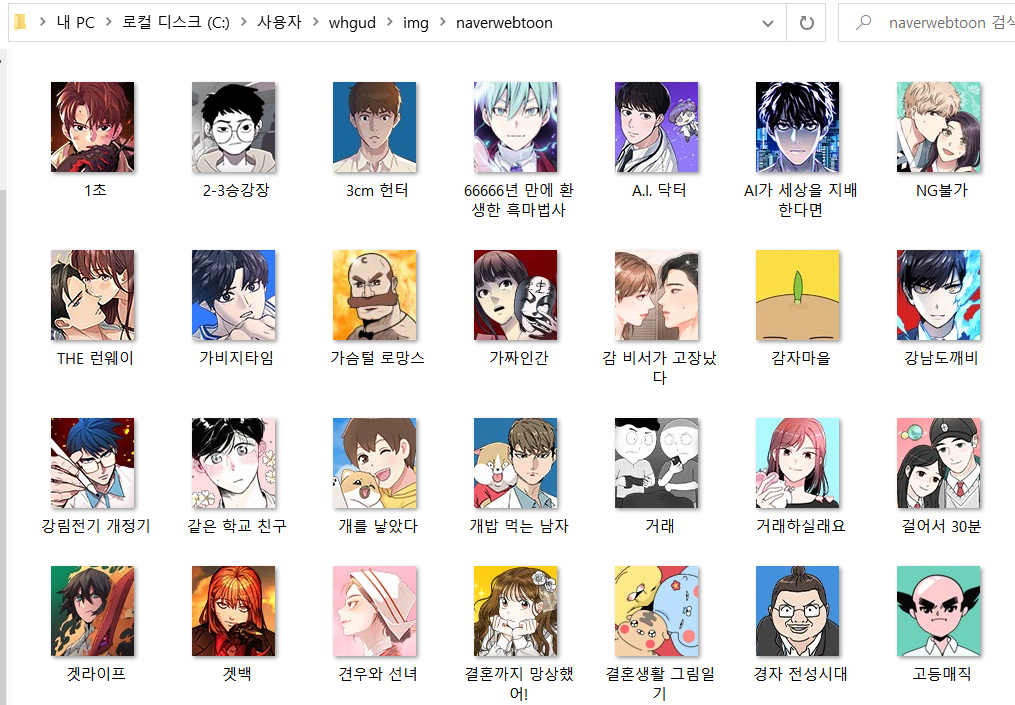

In [94]:
# 실행결과
from IPython.display import Image
Image('C:/Users/whgud/img/naverwebtoon/웹툰 이미지 크롤링 실행결과.png', width=700)

## 결론2
이미지 크롤링을 배워서 웹툰 이미지를 크롤링 해오는 실습을 진행해봤다. 
각 웹툰의 이미지에 맞는 제목을 넣어 다운 받는 것이 목표였다.
파일이름에 ? :가 포함될 수 없어서 파일이름에 ? 나 : 가 포함되어 있는 경우엔 이미지를 못 가져온채로 다운 되기도 하고 오류가 발생하였다.
오류를 해결하기 위해서 for 문에서 replace를 활용하여 table_list를 다시 수정하였다. 리스트내의 문자열 대체는 생각보다 마음대로 되지 않아 ?과 :를 한꺼번에 대체해주는 방식 대신 하나씩 각각 공백과 언더바로 대체해주는 것으로 해결하였다.
이제 한 페이지에서 이미지를 가져오는 것이 아니라 원하는 이미지가 여러페이지에 있어도 크롤링 하는 것에 도전해보고 싶다.